In [512]:
# Predict Password Strength using Natural Language Processing

In [513]:
# STEPS
# Topic Understanding
# Data Collection
# Data Cleaning
# Data Analysis
# Feature Engineering
# Model Building

In [514]:
# Business Understanding
# Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..

In [515]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [516]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

# Data Collection

In [517]:
# Data Colletcion

In [518]:
# ıf you do not want to deal with SQL
data = pd.read_csv("C:/Users/User/OneDrive/Desktop/Test2/data.csv", error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

In [519]:
data.head()

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [520]:
data.shape

(669640, 2)

# Data Cleaning

In [521]:
# Data Cleaning
data.columns

Index(['password', 'strength'], dtype='object')

In [522]:
data.head()

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [523]:
# Check if we have duplicate data or duplicate rows .
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Length: 669640, dtype: bool

In [524]:
data.duplicated().sum()

0

In [525]:
# check missing values in columns

In [526]:
data.isnull()

password  strength
0          False     False
1          False     False
2          False     False
3          False     False
4          False     False
...          ...       ...
669635     False     False
669636     False     False
669637     False     False
669638     False     False
669639     False     False

[669640 rows x 2 columns]

In [527]:
data.isnull().any()

password     True
strength    False
dtype: bool

In [528]:
data.isnull().any().sum()

1

In [529]:
# check data-types of every feature 

In [530]:
data.dtypes

password    object
strength     int64
dtype: object

In [531]:
# checking whether "strength" feature has irelevant or relevant values or not 

In [532]:
data["strength"]

0         1
1         1
2         1
3         1
4         1
         ..
669635    1
669636    1
669637    1
669638    1
669639    1
Name: strength, Length: 669640, dtype: int64

In [533]:
data["strength"].unique()
# irrevelant valeus yoktur.

array([1, 2, 0], dtype=int64)

# Semantic Analysis 

In [534]:
# Semantic Analysis It refers to the process of understanding and inferring the meaning of texts or text content. Semantic analysis concerns the ability to understand and interpret the semantic content of texts beyond text.

In [535]:
data.columns

Index(['password', 'strength'], dtype='object')

In [536]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669640, dtype: object

In [537]:
data["password"][0]

'kzde5577'

In [538]:
type(data["password"][0])
# We see that it is of string type
# So we can operate with string functions

str

In [539]:
# Ask some questions to do semantic analysis

In [540]:
# 1-) How many password textual actually holds only numeric characters ?

In [541]:
data["password"].str

In [542]:
data["password"].str.isnumeric()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [543]:
data["password"].str.isnumeric().sum()

108

In [544]:
data[data["password"].notna() & data["password"].str.isnumeric()]
# Checking which of my data consists of passwords containing only numbers.

password  strength
5597     445566         0
6263    1995151         0
27970   5252752         0
34293   2091024         0
41338    603030         0
...         ...       ...
634830   000000         0
635587       11         0
649848     1050         0
652957   363761         0
666512   111111         0

[108 rows x 2 columns]

In [545]:
data[data["password"].notna() & data["password"].str.isnumeric()].shape
# In this way, we can see how many passwords contain only numeric characters.

(108, 2)

In [546]:
# 2-) How many password textual actually holds only Upper-case character ?

In [547]:
data["password"].str.isupper()
# The isupper function checks whether all uppercase characters in a string are uppercase.

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [548]:
data["password"].str.isupper().sum()

10477

In [549]:
data[data["password"].notna() & data["password"].str.isupper()]

password  strength
268         AS0130066         1
269        QWERTY0011         1
323     YADHJIGSAWS11         1
346            IRZA98         0
486          PEPITO00         1
...               ...       ...
669458    ARNAV_KUSHI         1
669460      36802907A         1
669549    MARLENY2090         1
669557    RHBDJQHJU25         1
669610  0933674790MAK         1

[10477 rows x 2 columns]

In [550]:
data[data["password"].notna() & data["password"].str.isupper()].shape

(10477, 2)

In [551]:
# 3-) How many password textual actually holds only alphabet

In [552]:
data["password"].str.isalpha()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [553]:
data["password"].str.isalpha().sum()

330

In [554]:
data[data["password"].notna() & data["password"].str.isalpha()]

password  strength
231          gtlek         0
4602        trcske         0
6096         jijik         0
6500       piccolo         0
10740      Stphane         0
...            ...       ...
656049        vntm         0
657578     fuckyou         0
666278       mueco         0
666328  PomarancaÇ         1
666735      CARRIO         0

[330 rows x 2 columns]

In [555]:
data[data["password"].notna() & data["password"].str.isalpha()].shape

(330, 2)

In [556]:
# 4-)  How many password textual actually holds alpha-numeric character ?

In [557]:
data["password"].str.isalnum()

0         True
1         True
2         True
3         True
4         True
          ... 
669635    True
669636    True
669637    True
669638    True
669639    True
Name: password, Length: 669640, dtype: object

In [558]:
data["password"].str.isalnum().sum()

650892

In [559]:
data[data["password"].notna() & data["password"].str.isalnum()]

password  strength
0           kzde5577         1
1           kino3434         1
2          visi7k1yr         1
3           megzy123         1
4        lamborghin1         1
...              ...       ...
669635    10redtux10         1
669636     infrared1         1
669637  184520socram         1
669638     marken22a         1
669639      fxx4pw4g         1

[650892 rows x 2 columns]

In [560]:
data[data["password"].notna() & data["password"].str.isalnum()].shape

(650892, 2)

In [561]:
# 5-) How many password textual actually holds title-case character ?

In [562]:
data["password"].str.istitle()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [563]:
data["password"].str.istitle().sum()

6287

In [564]:
data[data["password"].notna() & data["password"].str.istitle()]

password  strength
65            Iamthelegend1!         2
369        Staterkom20081993         2
377           Oshity07142014         2
464     Scipio21152030067254         2
546                 1A2Z3E4R         1
...                      ...       ...
669079        Kustyk33935432         2
669157       28091974Zezinho         2
669199     City&Colour241091         2
669233        Codificando10~         2
669460             36802907A         1

[6287 rows x 2 columns]

In [565]:
data[data["password"].notna() & data["password"].str.istitle()].shape

(6287, 2)

In [566]:
# 6-) How many password textual actually holds special character ?

In [567]:
# There is no special function for this, so we will create the function ourselves

In [568]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669640, dtype: object

In [569]:
import string

In [570]:
string.punctuation ## all punctuations defined in "string" package !

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [571]:
# Coding a function that returns 1 if it contains a special character

def find_semantics(password):
    if pd.isna(password):
        return None  # or any other value you prefer for NaN
    for char in password:
        if char in string.punctuation:
            return 1
    return 0

In [572]:
data["password"].apply(find_semantics)
#This code applies each value in the "password" column to a function called find_semantics. That is, each value in the "password" column is passed as a parameter to the find_semantics function and replaced with the return value of that function.

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
669635    0.0
669636    0.0
669637    0.0
669638    0.0
669639    0.0
Name: password, Length: 669640, dtype: float64

In [573]:
data["password"].apply(find_semantics)==1
# This code applies each value in the "password" column to the find_semantics function and then compares the results to 1.


0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: bool

In [574]:
data[data["password"].apply(find_semantics)==1]

password  strength
20            elyass15@ajilent-ci         2
22               klara-tershina3H         2
44                         olmaz.         0
50                         ok>bdk         0
60          khmer100.03278&?><Mnb         2
...                           ...       ...
669554             gRAPEHORSE_289         2
669606     Felidae_blckPanther001         2
669618  juanpaganini588@gmail.com         2
669622           weslley.06888524         2
669627             sakaryal&#305;         2

[17893 rows x 2 columns]

In [575]:
(data["password"].apply(find_semantics)==1).sum()

17893

In [576]:
data[data["password"].apply(find_semantics)==1].shape

(17893, 2)

# Feature Engineering

In [577]:
data.head()

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [578]:
# length of every Password

In [579]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669640, dtype: object

In [580]:
data["password"][0]

'kzde5577'

In [581]:
len(data["password"][0])

8

In [582]:
data["password"].str.len()

0          8.0
1          8.0
2          9.0
3          8.0
4         11.0
          ... 
669635    10.0
669636     9.0
669637    12.0
669638     9.0
669639     8.0
Name: password, Length: 669640, dtype: float64

In [583]:
data["length"] = data["password"].str.len()
data["length"]

0          8.0
1          8.0
2          9.0
3          8.0
4         11.0
          ... 
669635    10.0
669636     9.0
669637    12.0
669638     9.0
669639     8.0
Name: length, Length: 669640, dtype: float64

In [584]:
# Frequency of Lowercase Characters :

In [585]:
password = "Burak23"
# I will understand the functions through this example password.

In [586]:
[char for char in password if char.islower()]

['u', 'r', 'a', 'k']

In [587]:
len([char for char in password if char.islower()])

4

In [588]:
len([char for char in password if char.islower()]) / len(password)

0.5714285714285714

In [589]:
# Why do we set the number of lowercase letters / password length?
# The purpose of this is to calculate how much of the password consists of lowercase characters by proportioning the total length of lowercase characters in a given "password" character string to the total length of the password. That is, it is used to calculate the upper-lower case ratio of the password.
# As for why this calculation is divided by length, this is to convert the ratio to a value between 0 and 1. No matter the length of the password, this ratio will always be between 0 and 1. Closer to 1, the password contains more lowercase letters, while closer to 0, it contains more uppercase letters, numbers, or symbols.
# In other words, we are actually normalizing and getting rid of the outliers since we set them between 0-1.
# In other words, if the value of the "lowercase_freq" variable I created below approaches 1, there are more lowercase letters; If the value of the "uppercase_freq" variable approaches 1, we can say that there are more uppercase letters.

In [590]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [591]:
# Frequency of Uppercase Characters

In [592]:
[char for char in password if char.isupper()]

['B']

In [593]:
len([char for char in password if char.isupper()])

1

In [594]:
len([char for char in password if char.islower()]) / len(password)

0.5714285714285714

In [595]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [596]:
# Frequency of Numeric Characters 

In [597]:
[char for char in password if char.isdigit()]

['2', '3']

In [598]:
len([char for char in password if char.isdigit()])

2

In [599]:
len([char for char in password if char.isdigit()]) / len(password)

0.2857142857142857

In [600]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [601]:
def freq_lowercase(password):
    if pd.isna(password):
        return np.nan  # or any other value you prefer for NaN
    return len([char for char in password if char.islower()]) / len(password) if len(password) > 0 else 0

def freq_uppercase(password):
    if pd.isna(password):
        return np.nan
    return len([char for char in password if char.isupper()]) / len(password) if len(password) > 0 else 0

def freq_numerical_case(password):
    if pd.isna(password):
        return np.nan
    return len([char for char in password if char.isdigit()]) / len(password) if len(password) > 0 else 0


data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [602]:
# Frequency of Special-case Characters 

In [603]:
# A more complex function for special characters because there is no function here that can find characters with a single function like isupper function

In [604]:
def freq_special_case(row):
    special_chars = [] 
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [605]:
def freq_special_case(password):
    if pd.isna(password):
        return np.nan  # or any other value you prefer for NaN
    special_chars = [char for char in password if not char.isalpha() and not char.isdigit()]
    return len(special_chars) / len(password) if len(password) > 0 else 0

data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [606]:
data.head(5)

password  strength  length  lowercase_freq  uppercase_freq  digit_freq  \
0     kzde5577         1     8.0           0.500             0.0       0.500   
1     kino3434         1     8.0           0.500             0.0       0.500   
2    visi7k1yr         1     9.0           0.778             0.0       0.222   
3     megzy123         1     8.0           0.625             0.0       0.375   
4  lamborghin1         1    11.0           0.909             0.0       0.091   

   special_char_freq  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [607]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [608]:
data.head()

password  strength  length  lowercase_freq  uppercase_freq  digit_freq  \
0     kzde5577         1     8.0           0.500             0.0       0.500   
1     kino3434         1     8.0           0.500             0.0       0.500   
2    visi7k1yr         1     9.0           0.778             0.0       0.222   
3     megzy123         1     8.0           0.625             0.0       0.375   
4  lamborghin1         1    11.0           0.909             0.0       0.091   

   special_char_freq  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

# Data Analysis

In [609]:
# Data Analysis
# Performing Descriptive Statistics
# mean,median,minimu,max etc.

In [610]:
# What are the maximum , minimum , mean and median value of the strength according to length,lowercase_freq , uppercase_freq , digit_freq ?

In [611]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [612]:
# "length" - "Strength" Analysis

In [613]:
data[["length" , "strength"]]

length  strength
0          8.0         1
1          8.0         1
2          9.0         1
3          8.0         1
4         11.0         1
...        ...       ...
669635    10.0         1
669636     9.0         1
669637    12.0         1
669638     9.0         1
669639     8.0         1

[669640 rows x 2 columns]

In [614]:
data[["length" , "strength"]].groupby("strength").agg(["min", "max" , "mean" , "median"])

length                         
            min    max       mean median
strength                                
0           1.0    7.0   6.549604    7.0
1           8.0   13.0   9.618964    9.0
2          14.0  220.0  15.932497   16.0

In [615]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')
#Comment
# Higher the length, Higher the strength
# In case on alphabet frequency higher is not better.
# On an average , 42% of characters are lowercase for higher strength 
# so that we can say when the  number of lower characters increases then strength of password will decrease

length
         length                         
            min    max       mean median
strength                                
0           1.0    7.0   6.549604    7.0
1           8.0   13.0   9.618964    9.0
2          14.0  220.0  15.932497   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708594  0.714
1                   0.0  0.923  0.629739  0.667
2                   0.0  0.933  0.422641  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012335  0.000
1                   0.0  0.923  0.008456  0.000
2                   0.0  0.905  0.367294  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                            

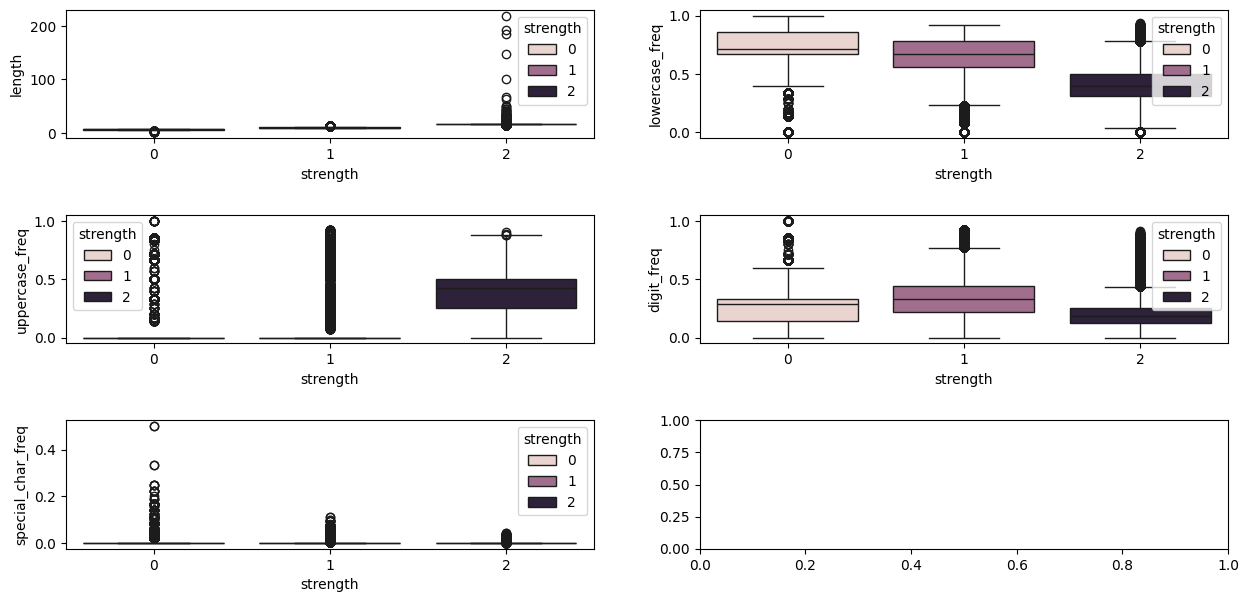

In [616]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [617]:
#  comment
# Higher Lowercase frequency is seen in low strength passwords
# For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.
#In digit_freq there is a split of majority poplutation of strength 1 and 2  but for 0 and 1 strength , there is overlap so no too much to say there. But we can say a nicely propotioned password is good..

# Feature Importance

In [618]:
data[data['strength']==0]

password  strength  length  lowercase_freq  uppercase_freq  digit_freq  \
21       intel1         0     6.0           0.833             0.0       0.167   
35      lsdlsd1         0     7.0           0.857             0.0       0.143   
44       olmaz.         0     6.0           0.833             0.0       0.000   
50       ok>bdk         0     6.0           0.833             0.0       0.000   
58       d04m11         0     6.0           0.333             0.0       0.667   
...         ...       ...     ...             ...             ...         ...   
669572  o3kkmwz         0     7.0           0.857             0.0       0.143   
669573  yenni91         0     7.0           0.714             0.0       0.286   
669593  vehlfb8         0     7.0           0.857             0.0       0.143   
669608   mo1152         0     6.0           0.333             0.0       0.667   
669634   sh4tup         0     6.0           0.833             0.0       0.167   

        special_char_freq  
21               0.000000  
35               0.000000  
44               0.027833  
50               0.027833  
58               0.000000  
...                   ...  
669572           0.000000  
669573           0.000000  
669593           0.000000  
669608           0.000000  
669634           0.000000  

[89702 rows x 7 columns]

In [619]:
data[data['strength']==0]["length"]

21        6.0
35        7.0
44        6.0
50        6.0
58        6.0
         ... 
669572    7.0
669573    7.0
669593    7.0
669608    6.0
669634    6.0
Name: length, Length: 89702, dtype: float64

In [620]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    # 1 row
    # 2 column
    
    # violinplot
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    
    plt.legend()
    plt.show()

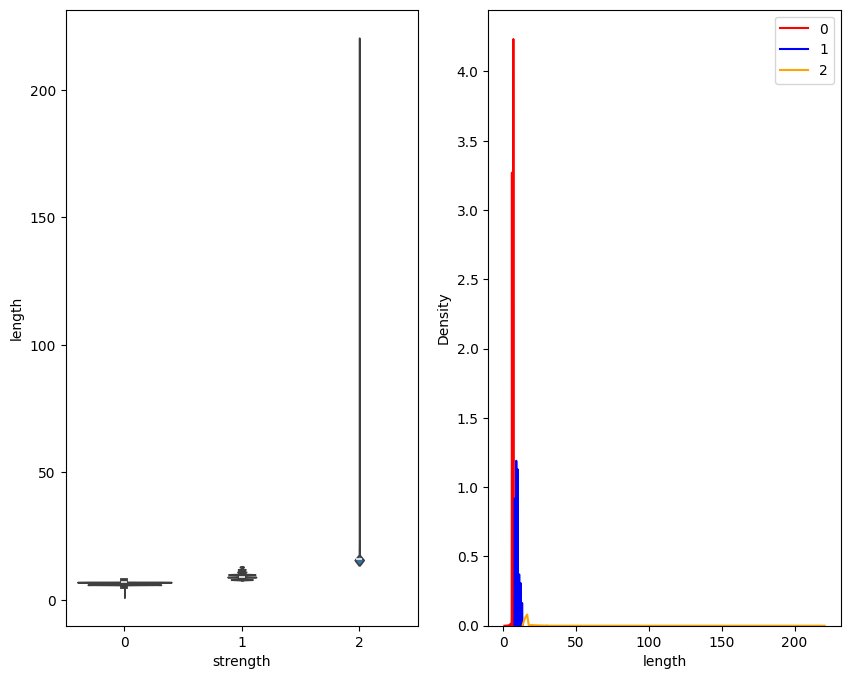

In [621]:
get_dist(data , "length")
# we have few overlappping region in distribution plot 

# when class is 2 , we have higher value of 'length' than class 1 & class 0

# it means 'length' is a interesting feature as we have very less overlapping region

# similarly from violinplot ,we will say on account of less overlappping ,this feature 'length' is amazing & useful in determining the strength

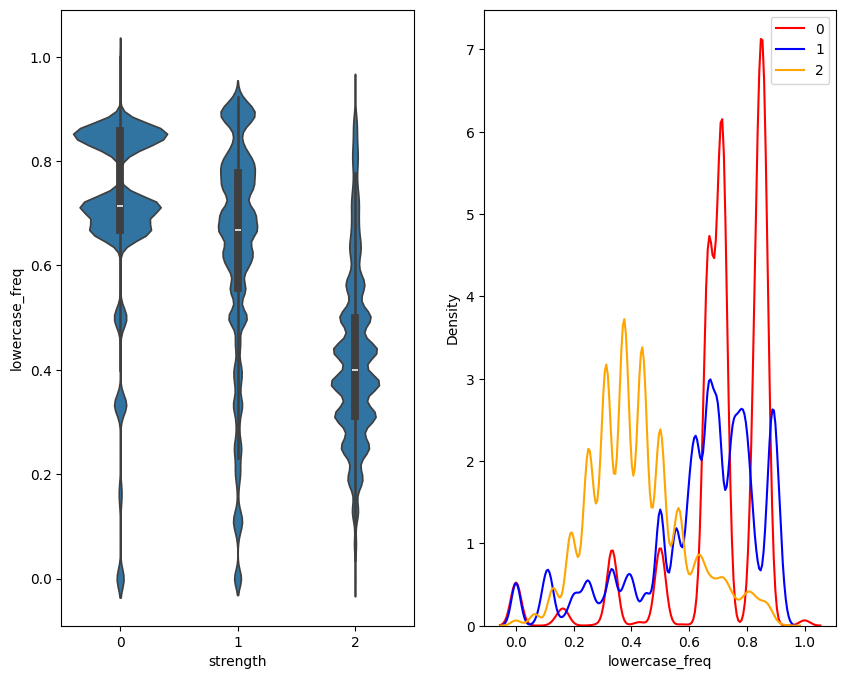

In [622]:
get_dist(data , 'lowercase_freq')

# distribution plot
# we have some kind of overlappping region in distribution plot 

# when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

# it means 'lower_freq' is an important feature

# violinplot
# similarly from violinplot ,we will say on account of such overlappping , 
# when class is 2 we have less value of 'lower_freq' than class 1 & class 0

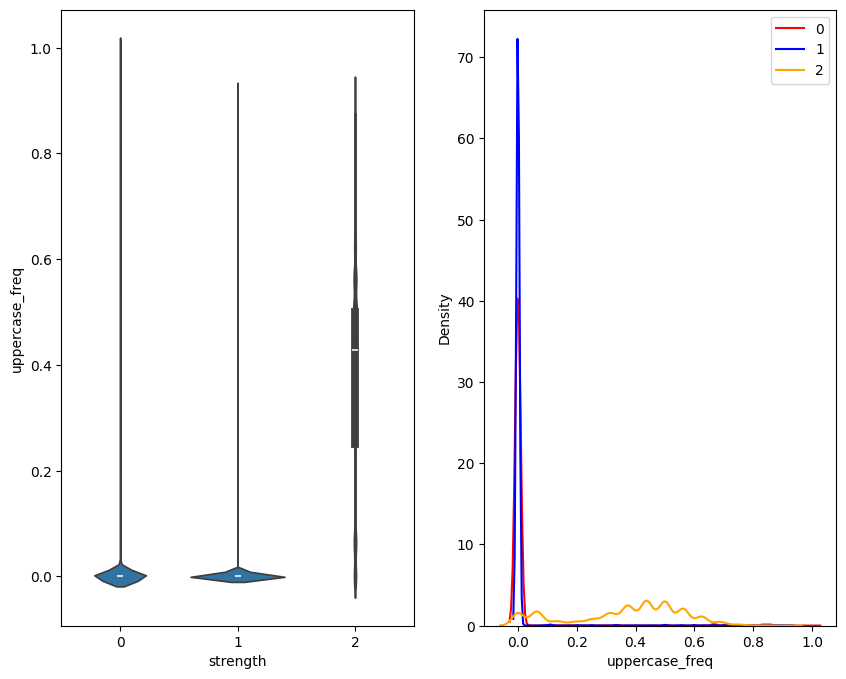

In [623]:
get_dist(data , 'uppercase_freq')

# distribution plot 
# we have quite high overlappping region in distribution plot

# it means 'upper_freq' is not that much important feature.

# violinplot
## similarly from violinplot ,we will say on account of such huge overlappping , 

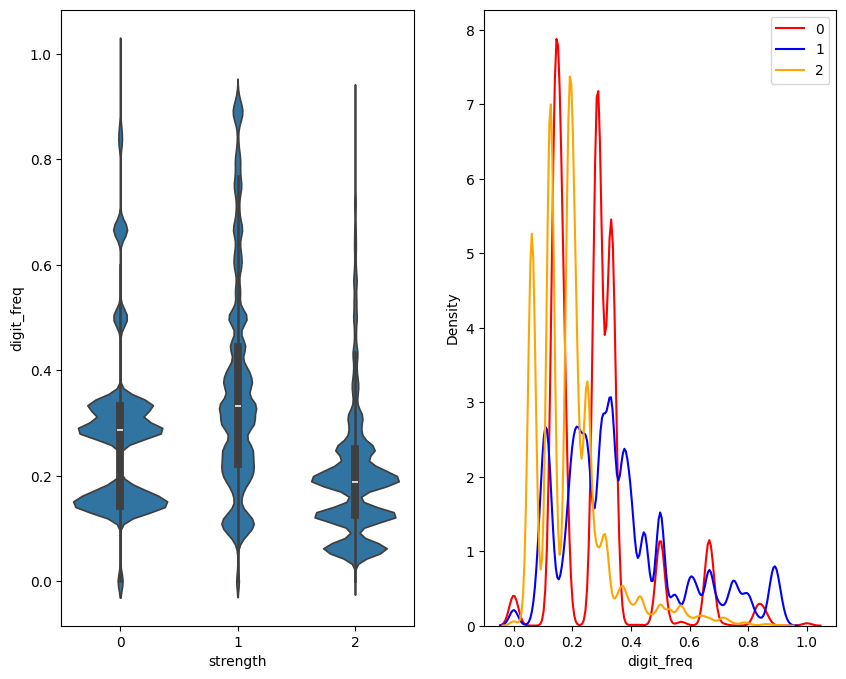

In [624]:
get_dist(data , 'digit_freq')
# we have quite high overlappping region in distribution plot 
# 'upper_freq' is not that much important feature

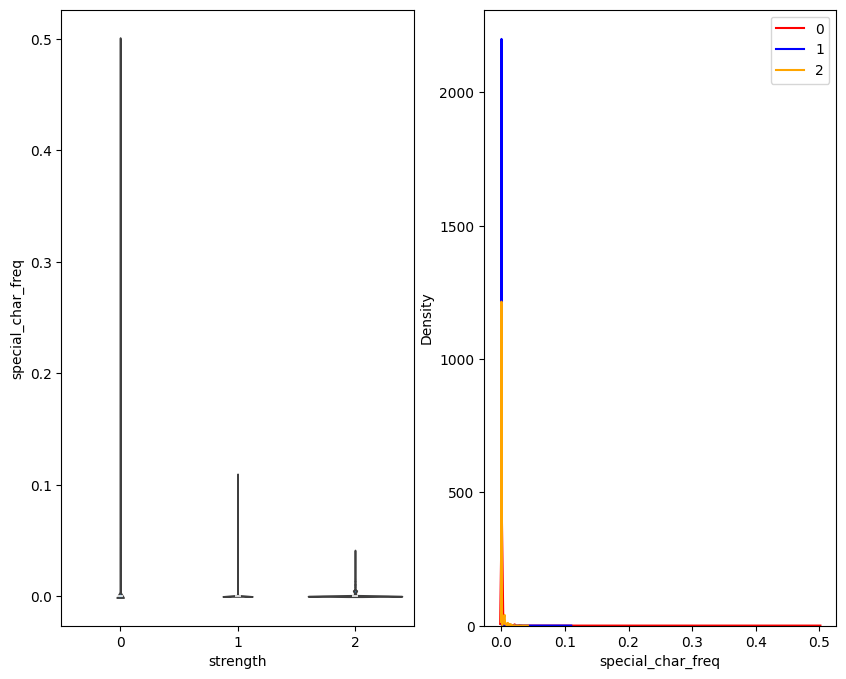

In [625]:
get_dist(data , 'special_char_freq')

In [626]:
# In summary, I determined the lower_freq and length variables as important variables.
# I will continue my journey using the new variables I created.

# Apply TF-IDF on data

In [627]:
# TF-IDF -> Term Frequency-Inverse Document Frequency

#TF-IDF is an abbreviation for the concept of "Term Frequency-Inverse Document Frequency" and is a text mining method used in fields such as natural language processing (NLP) and text mining.
#This method is used to evaluate the importance of words within documents and convert text data into numerical vectors.
#The main purpose of TF-IDF is to measure the importance of a word in a document within the overall document collection. This is done by taking into account how often a word occurs within a document (term frequency) and how rare the same word is in other documents (inverse document frequency).

# Term Frequency (TF - Term Frequency):
# Measures how often a word in a document appears within the document.
#Usually calculated by dividing the number of words by the total number of words in the document.
#High TF means a word occurs frequently within the document.

#Inverse Document Frequency (IDF):
#Measures how rare a word is among other documents.
#Rare words have higher IDF value.
#IDF is calculated by dividing the total number of documents within the document collection by the number of documents containing that word.

#TF-IDF Score:
#It is calculated by multiplying #TF and IDF values.
#The TF-IDF score of a word in a particular document reflects the importance of that word in the document.
#So, a word with high TF and high IDF will have a high TF-IDF score.

# TF-IDF is useful in text mining and information extraction applications because it converts text data into numerical vectors, making it easier to use machine learning algorithms
#Especially widely used in document classification, text classification, summarization, feature extraction and similar tasks

In [628]:
data.head()
# Here, the string values contained in the password variable cannot be understood by the ML algorithm.
# Represent the values contained in this password with numbers.

password  strength  length  lowercase_freq  uppercase_freq  digit_freq  \
0     kzde5577         1     8.0           0.500             0.0       0.500   
1     kino3434         1     8.0           0.500             0.0       0.500   
2    visi7k1yr         1     9.0           0.778             0.0       0.222   
3     megzy123         1     8.0           0.625             0.0       0.375   
4  lamborghin1         1    11.0           0.909             0.0       0.091   

   special_char_freq  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [629]:
# Convert this password feature into my vector representation.

In [630]:
data.sample(frac=1)

password  strength  length  lowercase_freq  \
450432            s1st3ml0ad         1    10.0           0.700   
254885         ilikeunix1976         1    13.0           0.692   
432603             30marina7         1     9.0           0.667   
511179  Camelsingh8103009306         2    20.0           0.450   
73417              igyhag128         1     9.0           0.667   
...                      ...       ...     ...             ...   
331065           0vu8awa5avi         1    11.0           0.727   
213480            alucards17         1    10.0           0.800   
124220      BA8nsgTA5OQSn0Xn         2    16.0           0.312   
166816              game1234         1     8.0           0.500   
579256             etopus752         1     9.0           0.667   

        uppercase_freq  digit_freq  special_char_freq  
450432            0.00       0.300                0.0  
254885            0.00       0.308                0.0  
432603            0.00       0.333                0.0  
511179            0.05       0.500                0.0  
73417             0.00       0.333                0.0  
...                ...         ...                ...  
331065            0.00       0.273                0.0  
213480            0.00       0.200                0.0  
124220            0.50       0.188                0.0  
166816            0.00       0.500                0.0  
579256            0.00       0.333                0.0  

[669640 rows x 7 columns]

In [631]:
dataframe = data.sample(frac=1)
dataframe

password  strength  length  lowercase_freq  uppercase_freq  \
603715         kyzaly421         1     9.0           0.667            0.00   
388347       hosam55raja         1    11.0           0.818            0.00   
535300        gopeto1996         1    10.0           0.600            0.00   
2532          ugudyqe371         1    10.0           0.700            0.00   
311154         teodoro12         1     9.0           0.778            0.00   
...                  ...       ...     ...             ...             ...   
378579         diadema20         1     9.0           0.778            0.00   
290667         tdxhryq47         1     9.0           0.778            0.00   
223326        xiomara123         1    10.0           0.700            0.00   
223382  Uim479zUxMwSz850         2    16.0           0.375            0.25   
47939         jqrrssqtd1         1    10.0           0.900            0.00   

        digit_freq  special_char_freq  
603715       0.333                0.0  
388347       0.182                0.0  
535300       0.400                0.0  
2532         0.300                0.0  
311154       0.222                0.0  
...            ...                ...  
378579       0.222                0.0  
290667       0.222                0.0  
223326       0.300                0.0  
223382       0.375                0.0  
47939        0.100                0.0  

[669640 rows x 7 columns]

# Apply NLP

In [632]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data
import pandas as pd

In [633]:
vectorizer = TfidfVectorizer(analyzer="char")

In [634]:
list(dataframe["password"])

['kyzaly421',
 'hosam55raja',
 'gopeto1996',
 'ugudyqe371',
 'teodoro12',
 'j5997g',
 'felphing123',
 'kc3UcLzUxNgZMyPL',
 'labios01',
 'playboy22',
 'soxuj459',
 'serkan92',
 'matraxman1',
 'lautaro512',
 '2ogv4sr',
 'root@admin',
 'maria16',
 'max71500',
 'vinayvinu63',
 'patlock1',
 'annmarie1',
 '8z4wqnbh2',
 'dental1',
 '1jPtoaTMzMADdvOy',
 'hkaprjue7',
 '6k08y2lx',
 'ziyo0494',
 'mymiracle91',
 'iskooba123',
 'mari1971',
 'iparow482',
 '84265790asd',
 'holoas2',
 '9OAT3mjkwNQ0t5Ov',
 'monstro07',
 'amybon262',
 'juuj1221',
 '1273302FAISAL',
 '6ocmkpfm',
 'comen1234',
 'monedas311',
 'ulijus997',
 '150248fc98',
 'size412356',
 '5456a0204',
 'OhsOlejA0MgKMfmp',
 'gynyqas563',
 'iwzmyxve08',
 '2o1aky188u',
 '1nevermind',
 'shijian2006',
 'mocny1993',
 'TjYge4DgzMwS39Jn',
 'harry222',
 'w2e7b0h7o7s0tMSB',
 'ypucix838',
 'ubinad688',
 'dohibi522',
 'allrise1',
 'salieski4',
 'serhog126',
 'ywajez634',
 'nududyr571',
 'dene29',
 'guipa23',
 'yassu543',
 'hz8y1cb',
 '7pzhdHTcwOQFyMtU',


In [635]:
x = list(dataframe["password"].fillna(''))
x

['kyzaly421',
 'hosam55raja',
 'gopeto1996',
 'ugudyqe371',
 'teodoro12',
 'j5997g',
 'felphing123',
 'kc3UcLzUxNgZMyPL',
 'labios01',
 'playboy22',
 'soxuj459',
 'serkan92',
 'matraxman1',
 'lautaro512',
 '2ogv4sr',
 'root@admin',
 'maria16',
 'max71500',
 'vinayvinu63',
 'patlock1',
 'annmarie1',
 '8z4wqnbh2',
 'dental1',
 '1jPtoaTMzMADdvOy',
 'hkaprjue7',
 '6k08y2lx',
 'ziyo0494',
 'mymiracle91',
 'iskooba123',
 'mari1971',
 'iparow482',
 '84265790asd',
 'holoas2',
 '9OAT3mjkwNQ0t5Ov',
 'monstro07',
 'amybon262',
 'juuj1221',
 '1273302FAISAL',
 '6ocmkpfm',
 'comen1234',
 'monedas311',
 'ulijus997',
 '150248fc98',
 'size412356',
 '5456a0204',
 'OhsOlejA0MgKMfmp',
 'gynyqas563',
 'iwzmyxve08',
 '2o1aky188u',
 '1nevermind',
 'shijian2006',
 'mocny1993',
 'TjYge4DgzMwS39Jn',
 'harry222',
 'w2e7b0h7o7s0tMSB',
 'ypucix838',
 'ubinad688',
 'dohibi522',
 'allrise1',
 'salieski4',
 'serhog126',
 'ywajez634',
 'nududyr571',
 'dene29',
 'guipa23',
 'yassu543',
 'hz8y1cb',
 '7pzhdHTcwOQFyMtU',


In [636]:
X = vectorizer.fit_transform(x)

In [637]:
X.shape

(669640, 153)

In [638]:
dataframe["password"].shape

(669640,)

In [639]:
X
# X holds only vector(values)  , it doesnt hold any feature name

<669640x153 sparse matrix of type '<class 'numpy.float64'>'
	with 5645405 stored elements in Compressed Sparse Row format>

In [640]:
X.toarray() 
# This is array represenatation of entire password feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [641]:
X.toarray()[0] ## TF-IDF scores of Ist row
# This is a vector represantation of the first password

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21654379, 0.25099288, 0.        , 0.30991057, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20899676, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32282296, 0.30053346, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [642]:
dataframe["password"]

603715           kyzaly421
388347         hosam55raja
535300          gopeto1996
2532            ugudyqe371
311154           teodoro12
                ...       
378579           diadema20
290667           tdxhryq47
223326          xiomara123
223382    Uim479zUxMwSz850
47939           jqrrssqtd1
Name: password, Length: 669640, dtype: object

In [643]:
vectorizer.get_feature_names_out()

array(['\x01', '\x02', '\x04', '\x05', '\x06', '\x08', '\x0e', '\x0f',
       '\x10', '\x11', '\x12', '\x13', '\x16', '\x17', '\x18', '\x19',
       '\x1b', '\x1c', '\x1d', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '\xa0',
       '¡', '¢', '¤', '¦', '§', '¨', '«', '¯', '°', '±', '²', '³', '´',
       'µ', '¶', '·', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'à',
       'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'í', 'î', 'ï',
       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý',
       'þ', 'ÿ', 'œ', 'ƒ', '—', '‚', '‡', '…', '‹', '›', '™'],
      dtype=object)

In [644]:
len(vectorizer.get_feature_names_out())

153

In [645]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

                                      ...    ÿ    œ    ƒ  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
669635  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
669636  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
669637  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
669638  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
669639  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

          —    ‚    ‡    …    ‹    ›    ™  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
669635  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
669636  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
669637  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
669638  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
669639  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[669640 rows x 153 columns]

In [646]:
df2.iloc[:, 20:50]


!    "    #    $    %    &    (    )    *  ...        6  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.30448   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
669635  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
669636  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
669637  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
669638  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   
669639  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.00000   

               7         8         9    ;    <    =    >    ?    @  
0       0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.000000  0.000000  0.561003  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.307935  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
...          ...       ...       ...  ...  ...  ...  ...  ...  ...  
669635  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
669636  0.326967  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
669637  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
669638  0.217486  0.212113  0.201240  0.0  0.0  0.0  0.0  0.0  0.0  
669639  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[669640 rows x 30 columns]

# Logistic Regression

In [647]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [648]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [649]:
# Fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(df2)

df2.head()

                                      ...    ƒ    —    ‚    ‡  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     …    ‹    ›    ™  length  lowercase_freq  
0  0.0  0.0  0.0  0.0     8.0           0.500  
1  0.0  0.0  0.0  0.0     8.0           0.500  
2  0.0  0.0  0.0  0.0     9.0           0.778  
3  0.0  0.0  0.0  0.0     8.0           0.625  
4  0.0  0.0  0.0  0.0    11.0           0.909  

[5 rows x 155 columns]

In [650]:
y = dataframe["strength"]

In [651]:
y

603715    1
388347    1
535300    1
2532      1
311154    1
         ..
378579    1
290667    1
223326    1
223382    2
47939     1
Name: strength, Length: 669640, dtype: int64

In [652]:
# split data into train & test

In [653]:
from sklearn.model_selection import train_test_split

In [654]:
X_train, X_test, y_train, y_test = train_test_split(X_train_imputed, y, test_size=0.20, random_state=42)

In [655]:
X_train.shape

(535712, 155)

In [656]:
y_train.shape

(535712,)

In [657]:
# Applying Logistic Regression

In [658]:
from sklearn.linear_model import LogisticRegression

In [659]:
clf = LogisticRegression(multi_class="multinomial")


In [660]:
clf.fit(X_train , y_train) #train model

LogisticRegression(multi_class='multinomial')

In [661]:
y_pred = clf.predict(X_test) ##  predict on X-Test data

In [662]:
y_pred

array([0, 1, 2, ..., 1, 1, 2], dtype=int64)

In [663]:
from collections import Counter

In [664]:
Counter(y_pred)

Counter({0: 9281, 1: 112077, 2: 12570})

# Make prediction with user-entered input

In [665]:
password = "%@123abcd"

In [666]:
sample_array = np.array([password])

In [667]:
sample_array

array(['%@123abcd'], dtype='<U9')

In [668]:
sample_matrix = vectorizer.transform(sample_array)

In [669]:
sample_matrix

<1x153 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [670]:
type(sample_matrix)

scipy.sparse._csr.csr_matrix

In [671]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70797349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49406757,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [672]:
sample_matrix.toarray().shape

(1, 153)

In [673]:
# length_of_password
len(password)

9

In [674]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [675]:
# The value of the remaining 2 dimensions for this password
# length -> 4
# lower_case_freq -> 0.4444444444444444
# Add these values to 99-dimensional matrix and make it 101

In [676]:
np.append(sample_matrix.toarray() , (9, 0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70797349, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.49406757,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [677]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(155,)

In [678]:
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, -1)
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, -1)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70797349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49406757,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [679]:
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, -1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70797349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49406757,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [680]:
new_matrix = np.append(sample_matrix.toarray(), [9, 0.444]).reshape(1, -1)

In [690]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [682]:
def predict():
    password = input("")
    sample_array = np.array([password])

    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()]) / len(password)

    new_matrix2 = np.append(sample_matrix.toarray(), [length_pass, length_normalised_lowercase]).reshape(1, -1)

    result = clf.predict(new_matrix2)

    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [684]:
predict()

'Password is weak'

In [692]:
import pickle

# Save the model to a file
model = 'C:/Users/user/OneDrive/Desktop/Test2/static/classification_model.pkl'
pickle.dump(clf, open(model, 'wb'))

# Model evaluation

In [685]:
# We will check Accuracy of your model using confusion_matrix, accuracy_score

In [686]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [687]:
accuracy_score(y_test , y_pred)

0.8055074368317304

In [688]:
confusion_matrix(y_test , y_pred)

array([[ 4932, 12897,    15],
       [ 3913, 92910,  2517],
       [  436,  6270, 10038]], dtype=int64)

In [689]:
# Create report of your model
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.53      0.28      0.36     17844
           1       0.83      0.94      0.88     99340
           2       0.80      0.60      0.68     16744

    accuracy                           0.81    133928
   macro avg       0.72      0.60      0.64    133928
weighted avg       0.79      0.81      0.79    133928

